## 1. Geographic Data

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives. Raw geographic data like latitudes and longitudes are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.

In this mission, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights website](http://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

- <span style="background-color: #F9EBEA; color:##C0392B">airlines.csv</span> - data on each airline.
    - <span style="background-color: #F9EBEA; color:##C0392B">country</span> - where the airline is headquartered.
    - <span style="background-color: #F9EBEA; color:##C0392B">active</span> - if the airline is still active.
- <span style="background-color: #F9EBEA; color:##C0392B">airports.csv</span> - data on each airport.
    - <span style="background-color: #F9EBEA; color:##C0392B">name</span> - name of the airport.
    - <span style="background-color: #F9EBEA; color:##C0392B">city</span> - the airport is located.
    - <span style="background-color: #F9EBEA; color:##C0392B">country</span> - country the airport is located.
    - <span style="background-color: #F9EBEA; color:##C0392B">code</span> - unique airport code.
    - <span style="background-color: #F9EBEA; color:##C0392B">latitude</span> - latitude value.
    - <span style="background-color: #F9EBEA; color:##C0392B">longitude</span> - longitude value.
- <span style="background-color: #F9EBEA; color:##C0392B">routes.csv</span> - data on each flight route.
    - <span style="background-color: #F9EBEA; color:##C0392B">airline</span> - airline for the route.
    - <span style="background-color: #F9EBEA; color:##C0392B">source</span> - starting city for the route.
    - <span style="background-color: #F9EBEA; color:##C0392B">dest</span> - destination city for the route.

We can explore a range of interesting questions and ideas using these datasets:

- For each airport, which destination airport is the most common?

- Which cities are the most important hubs for airports and airlines?

Before diving into coordinate systems, explore the datasets in the code cell below.

In [3]:
import pandas as pd
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes  = pd.read_csv('routes.csv')

print(airports.iloc[0])
print(airlines.iloc[0])
print(routes.iloc[0])

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


## 2. Geographic cordinate systems

A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0RVJ6c1U2Rl8wdWM">

| Name                              | City          | State | Latitude  | Longitude   |
|-----------------------------------|---------------|-------|-----------|-------------|
| White House                       | Washington    | DC    | 38.898166 | -77.036441  |
| Alcatraz Island                   | San Francisco | CA    | 37.827122 | -122.422934 |
| Instituto Metrópole Digital       | Natal         | RN    | -5.831997 | -35.205415  |

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). We'll use the [Mercator](https://en.wikipedia.org/wiki/Mercator_projection) projection, because it is commonly used by popular mapping software.

## 3. Installing Basemap

Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the [basemap toolkit](http://matplotlib.org/basemap/). Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The [documentation for basemap](http://matplotlib.org/basemap/users/intro.html) provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.
Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly. Before we dive into how basemap works, let's get familiar with how to install it.

The easiest way to install basemap is through Anaconda. 

>```python
conda install -c conda-forge basemap
```

The Basemap library has some external dependencies that Anaconda handles the installation for. To test the installation, run the following import code:

>```python
from mpl_toolkits.basemap import Basemap
```

Because basemap uses matplotlib, you'll want to import <span style="background-color: #F9EBEA; color:##C0392B">matplotlib.pyplot</span> into your environment when you use Basemap.

## 4. Workflow with basemap

Here's what the general workflow will look like when working with two-dimensional maps:

- Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
- Convert spherical coordinates to Cartesian coordinates using the basemap instance.
- Use the matplotlib and basemap methods to customize the map.
- Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the [basemap constructor](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap) and pass in values for the required parameters:

- <span style="background-color: #F9EBEA; color:##C0392B">projection</span>: the map projection.
- <span style="background-color: #F9EBEA; color:##C0392B">llcrnrlat</span>: latitude of lower left hand corner of the desired map domain
- <span style="background-color: #F9EBEA; color:##C0392B">urcrnrlat</span>: latitude of upper right hand corner of the desired map domain
- <span style="background-color: #F9EBEA; color:##C0392B">llcrnrlon</span>: longitude of lower left hand corner of the desired map domain
- <span style="background-color: #F9EBEA; color:##C0392B">urcrnrlon</span>: longitude of upper right hand corner of the desired map domain

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180)

## 5. Converting From Spherical to Cartesian Coordinates

As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use [Series.tolist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.tolist.html) to convert the <span style="background-color: #F9EBEA; color:##C0392B">longitude</span> and <span style="background-color: #F9EBEA; color:##C0392B">latitude</span> columns from the <span style="background-color: #F9EBEA; color:##C0392B">airports</span> dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:

>```python
x, y = m(longitudes, latitudes)
```

The basemap object will return 2 list objects, which we assign to <span style="background-color: #F9EBEA; color:##C0392B">x</span> and <span style="background-color: #F9EBEA; color:##C0392B">y</span>. Finally, we display the first 5 elements of the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Convert the longitude values from spherical to Cartesian and assign the resulting list to <span style="background-color: #F9EBEA; color:##C0392B">x</span>.
2. Convert the latitude values from spherical to Cartesian and assign the resulting list to <span style="background-color: #F9EBEA; color:##C0392B">y</span>.

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180)

x, y = m(airports['longitude'].tolist(), airports['latitude'].tolist())

## 6. Generating a scatter plot

Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of <span style="background-color: #F9EBEA; color:##C0392B">x</span> and <span style="background-color: #F9EBEA; color:##C0392B">y</span> coordinates, we use the [basemap.scatter()](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.scatter) method.

>```python
m.scatter(x,y)
```

The <span style="background-color: #F9EBEA; color:##C0392B">basemap.scatter()</span> method has similar parameters to the [pyplot.scatter()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). For example, we can customize the size of each marker using the <span style="background-color: #F9EBEA; color:##C0392B">s</span> parameter:

>```python
# Large markers.
m.scatter(x,y,s=10)
# Smaller markers.
m.scatter(x,y,s=5)
```

After we've created the scatter plot, use <span style="background-color: #F9EBEA; color:##C0392B">plt.show()</span> to display the plot. We'll dive more into customizing the plot in the next step but now, create a simple scatter plot.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Create a scatter plot using the converted latitude and longitude values using a marker size of **1**.
2. Display the scatter plot.

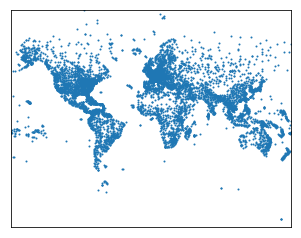

In [46]:
m.scatter(x,y,s=1)
plt.show()

## 7. Customizing The Plot Using Basemap

You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the <span style="background-color: #F9EBEA; color:##C0392B">basemap.drawcoastlines(color='color_name')</span> method. Other customization is fill the continents and inlad lakes using some background color <span style="background-color: #F9EBEA; color:##C0392B">basemap.fillcontinents(color='color_name', lake_color='color_name')</span>. 
Draw the boundaries of each country is another best practice. <span style="background-color: #F9EBEA; color:##C0392B">basemap.drawcountries(color='color_name')</span>



<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Use <span style="background-color: #F9EBEA; color:##C0392B">basemap.drawcoastlines()</span>, <span style="background-color: #F9EBEA; color:##C0392B">basemap.fillcontinents()</span> and <span style="background-color: #F9EBEA; color:##C0392B">basemap.drawcountries()</span> to customize your map. Tip: fillcontinents() has support to **alpha** property which sets alpha transparency for continent polygons.
2. Display the plot using <span style="background-color: #F9EBEA; color:##C0392B">plt.show()</span>.


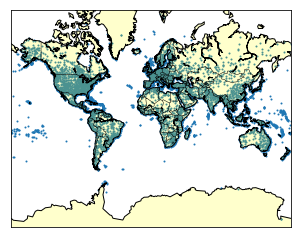

In [9]:
m.drawcoastlines(color='black')
m.fillcontinents(color='yellow', lake_color='blue', alpha=0.2)
m.drawcountries(color='black')

m.scatter(x,y,s=1)
plt.show()

## 8. Customizing The Plot Using Matplotlib

We can add code that:

- uses <span style="background-color: #F9EBEA; color:##C0392B">pyplot.subplots() </span> to specify the <span style="background-color: #F9EBEA; color:##C0392B">figsize</span> parameter
- returns the Figure and Axes object for a single subplot and assigns to <span style="background-color: #F9EBEA; color:##C0392B">fig</span> and <span style="background-color: #F9EBEA; color:##C0392B">ax</span> respectively
- use the <span style="background-color: #F9EBEA; color:##C0392B">Axes.set_title()</span> method to set the map title

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Before creating the basemap instance and generating the scatter plot, add code that:
    - creates a figure with a height of 15 inches and a width of 20 inches
    - sets the title of the scatter plot to <span style="background-color: #F9EBEA; color:##C0392B">"Scaled Up Earth With Coastlines"</span>


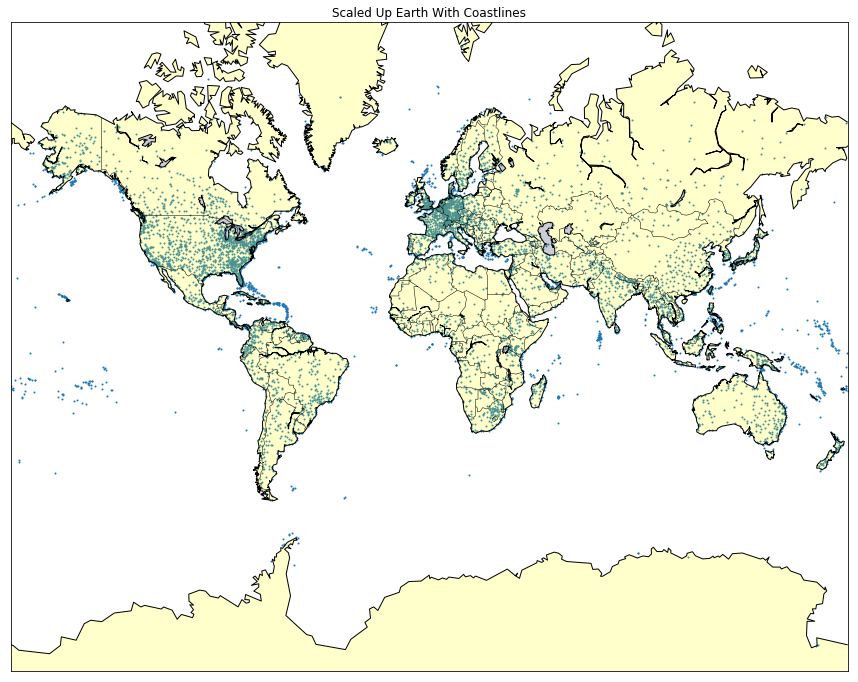

In [13]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")

m.drawcoastlines(color='black')
m.fillcontinents(color='yellow', lake_color='blue', alpha=0.2)
m.drawcountries(color='black')

m.scatter(x,y,s=1)
plt.show()

## 9. Introduction to Great Circles

To better understand the flight routes, we can draw **great circles** to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0blFtbmNLRlpWVkE">

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0bW9fOHBDam9DdTA">

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection. We can use these to visualize the flight <span style="background-color: #F9EBEA; color:##C0392B">routes</span> from the routes dataframe. To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. While the <span style="background-color: #F9EBEA; color:##C0392B">routes</span> dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (<span style="background-color: #F9EBEA; color:##C0392B">airports</span>).

To make things easier, we've created a new CSV file called <span style="background-color: #F9EBEA; color:##C0392B">geo_routes.csv</span> that contains the latitude and longitude values corresponding to the source and destination airports for each route. We've also removed some columns we won't be working with.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Read geo_routes.csv into a dataframe named <span style="background-color: #F9EBEA; color:##C0392B">geo_routes</span>.
2. Use the <span style="background-color: #F9EBEA; color:##C0392B">DataFrame.info()</span> method to look for columns containing any null values.
3. Display the first five rows in <span style="background-color: #F9EBEA; color:##C0392B">geo_routes</span>.

In [14]:
geo_routes = pd.read_csv('geo_routes.csv')
geo_routes.info()
geo_routes.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


## 10. Displaying Great Circles

We use the <span style="background-color: #F9EBEA; color:##C0392B">basemap.drawgreatcircle()</span> method to display a great circle between 2 points. The <span style="background-color: #F9EBEA; color:##C0392B">basemap.drawgreatcircle()</span> method requires four parameters in the following order:

- <span style="background-color: #F9EBEA; color:##C0392B">lon1</span> - longitude of the starting point.
- <span style="background-color: #F9EBEA; color:##C0392B">lat1</span> - latitude of the starting point.
- <span style="background-color: #F9EBEA; color:##C0392B">lon2</span> - longitude of the ending point.
- <span style="background-color: #F9EBEA; color:##C0392B">lat2</span> - latitude of the ending point.

The following code generates a great circle for the first three routes in the dataframe:

>```python
m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)
```

Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the <span style="background-color: #F9EBEA; color:##C0392B">basemap.drawgreatcircle()</span> method isn't able to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the [documentation](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle) for the method:

**Note**: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

Write a function, named <span style="background-color: #F9EBEA; color:##C0392B">create_great_circles()</span> that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. This function should:
- Accept a dataframe as the sole parameter
- Iterate over the rows in the dataframe using <span style="background-color: #F9EBEA; color:##C0392B">DataFrame.iterrows()</span>
- For each row:
    - Draw a great circle using the four geographic coordinates **only** if:
        - The absolute difference between the latitude values (<span style="background-color: #F9EBEA; color:##C0392B">end_lat</span> and <span style="background-color: #F9EBEA; color:##C0392B">start_lat</span>) is less than 180.
        - If the absolute difference between the longitude values (<span style="background-color: #F9EBEA; color:##C0392B">end_lon</span> and <span style="background-color: #F9EBEA; color:##C0392B">start_lon</span>) is less than 180.
- Create a filtered dataframe containing just the routes that start at the DFW airport.
    - Select only the rows in <span style="background-color: #F9EBEA; color:##C0392B">geo_routes</span> where the value for the source column equals <span style="background-color: #F9EBEA; color:##C0392B">"DFW"</span>.
    - Assign the resulting dataframe to <span style="background-color: #F9EBEA; color:##C0392B">dfw</span>.
- Pass <span style="background-color: #F9EBEA; color:##C0392B">dfw</span> into <span style="background-color: #F9EBEA; color:##C0392B">create_great_circles()</span> and display the plot using the <span style="background-color: #F9EBEA; color:##C0392B">pyplot.show()</span> function.

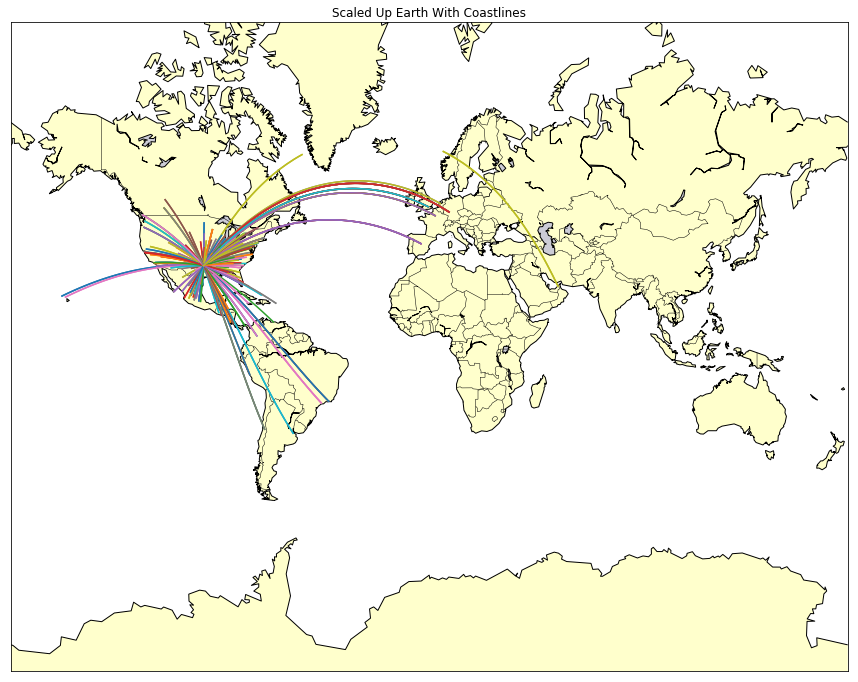

In [66]:
plt.figure(figsize=(15,20))
plt.title("Scaled Up Earth With Coastlines")

def create_great_circles(df):
    for index, row in df.iterrows():
        if abs(row['end_lat'] - row['start_lat']) < 180 and abs(row['end_lon'] - row['start_lon']) < 180:
            m.drawgreatcircle(row['start_lon'], row['start_lat'], row['end_lon'], row['end_lat'])

is_dfw = geo_routes["source"] == "DFW"
dfw = geo_routes[is_dfw]

create_great_circles(dfw)

m.drawcoastlines(color='black')
m.fillcontinents(color='yellow', lake_color='blue', alpha=0.2)
m.drawcountries(color='black')

plt.show()

## 11. Guided customization

### 11.1 Draw day-night terminator on a map

>```python
from datetime import datetime
import numpy as np
# Create a figure  
fig, ax = plt.subplots(figsize=(15,20))
plt.title('Day/Night Map for %s (UTC)' % datetime.now().strftime("%d %b %Y %H:%M:%S"))
# Configure the basemap
m.scatter(x,y,s=0.1,color="red")
m.drawcountries(color='black')
m.fillcontinents(color='#0066CC', lake_color='white', alpha=0.1)
m.drawcoastlines()
# Draw lines of latitude (parallels) and longitude (meridians)
m.drawparallels(range(-90,91,10), color='#CCCCCC')
m.drawmeridians(range(-180,181,10), color='#CCCCCC')
# Day/Night shade (note the datetime is utc here)
m.nightshade(datetime.utcnow()) 
# Plot the figure
plt.show()
```

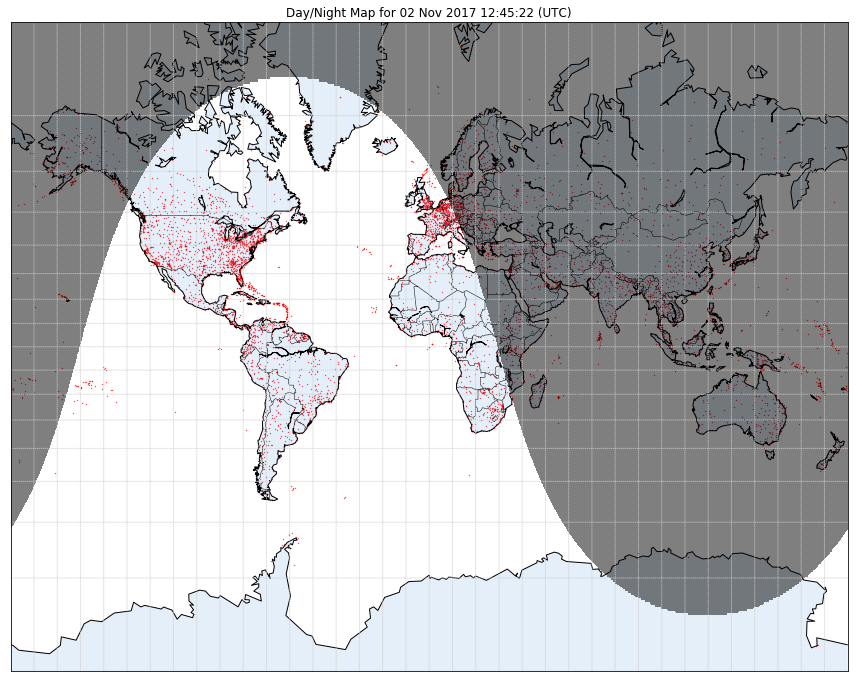

In [16]:
from datetime import datetime
import numpy as np
# Create a figure  
fig, ax = plt.subplots(figsize=(15,20))
plt.title('Day/Night Map for %s (UTC)' % datetime.now().strftime("%d %b %Y %H:%M:%S"))
# Configure the basemap
m.scatter(x,y,s=0.1,color="red")
m.drawcountries(color='black')
m.fillcontinents(color='#0066CC', lake_color='white', alpha=0.1)
m.drawcoastlines()
# Draw lines of latitude (parallels) and longitude (meridians)
m.drawparallels(range(-90,91,10), color='#CCCCCC')
m.drawmeridians(range(-180,181,10), color='#CCCCCC')
# Day/Night shade (note the datetime is utc here)

m.nightshade(datetime.utcnow()) 
# Plot the figure
plt.show()